In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris


In [90]:
df=pd.read_csv('datasets/iris.csv')

In [91]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [93]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [94]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [95]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

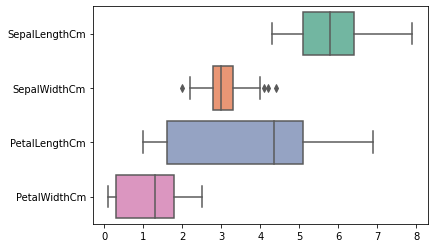

In [96]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

C:\Users\kiran\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

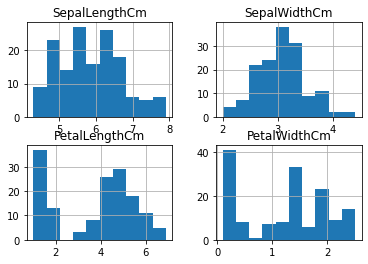

In [97]:
df.hist()

In [98]:
x=df.iloc[:,0:4]
y=df.iloc[:,-1:]

In [99]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [100]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
lb=LabelEncoder()

In [103]:
df['Species']=lb.fit_transform(df['Species'])

In [104]:
y=df['Species']

In [105]:
y.unique()

array([0, 1, 2])

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [107]:

x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
126,6.2,2.8,4.8,1.8
23,5.1,3.3,1.7,0.5
64,5.6,2.9,3.6,1.3
117,7.7,3.8,6.7,2.2
84,5.4,3.0,4.5,1.5
...,...,...,...,...
75,6.6,3.0,4.4,1.4
43,5.0,3.5,1.6,0.6
22,4.6,3.6,1.0,0.2
72,6.3,2.5,4.9,1.5


In [108]:
y_train

126    2
23     0
64     1
117    2
84     1
      ..
75     1
43     0
22     0
72     1
15     0
Name: Species, Length: 120, dtype: int32

In [109]:
knn=KNeighborsClassifier(n_neighbors=3)

In [110]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [111]:
prediction=knn.predict(x_test)

In [112]:
scores=knn.score(x_test,y_test)

In [113]:
scores

1.0

In [114]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [115]:
metrics.accuracy_score(y_test,prediction)

1.0